<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [74]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [75]:
df = pd.DataFrame(movies)
print("Number of Rows " + str(len(df.axes[0])))
print("Number of Columns " + str(len(df.axes[1])))

Number of Rows 979
Number of Columns 6


#### Check the data type of each column.

In [76]:
data_types = df.dtypes
print("Data type of each column:")
print(data_types)

Data type of each column:
star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


#### Calculate the average movie duration.

In [77]:
print("Average movie duration is "+ str(df["duration"].mean()))

Average movie duration is 120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [78]:
df = df.sort_values(["duration"])
print("Shortest movie is "+df["title"].iloc[0] + " with duration of " + str(df["duration"].iloc[0]))
print("Longest movie is "+df["title"].iloc[-1] + " with duration of " + str(df["duration"].iloc[-1]))

Shortest movie is Freaks with duration of 64
Longest movie is Hamlet with duration of 242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124910bd0>]],
      dtype=object)

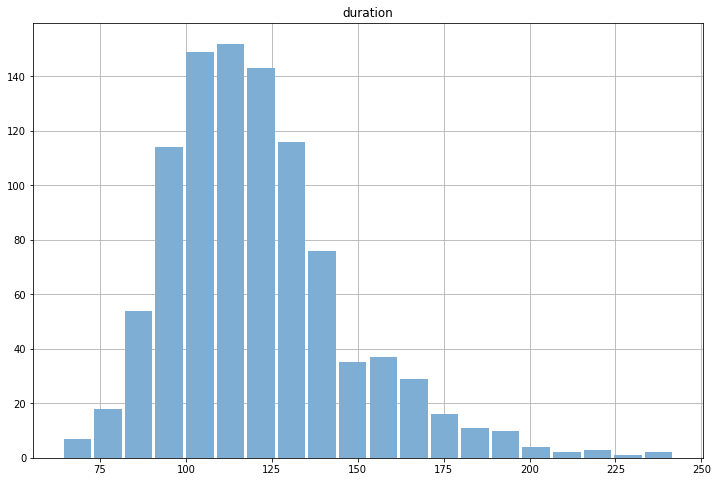

In [79]:
df.hist(column="duration", bins=20, grid=True, figsize=(12,8), color='#7faed4', zorder=2, rwidth=0.9)

#### Use a box plot to display that same data.

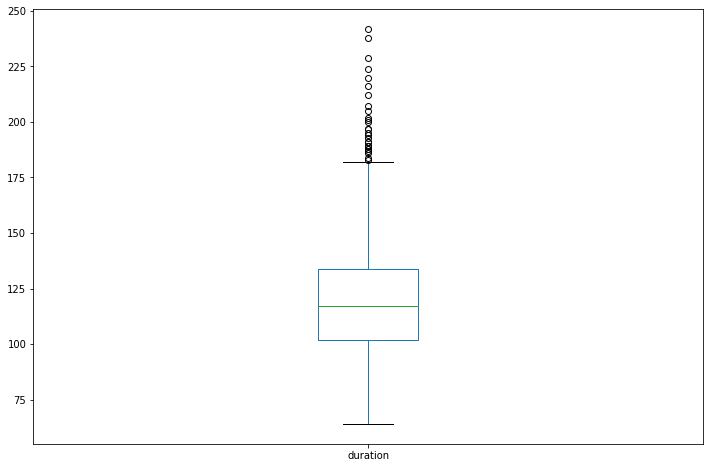

In [80]:
df.boxplot(column=['duration'], grid=False, figsize=(12,8))

## Intermediate level

#### Count how many movies have each of the content ratings.

In [81]:
print(df[['title', 'content_rating']].groupby(['content_rating']).agg(['count']))

               title
               count
content_rating      
APPROVED          47
G                 32
GP                 3
NC-17              7
NOT RATED         65
PASSED             7
PG               123
PG-13            189
R                460
TV-MA              1
UNRATED           38
X                  4


#### Use a visualization to display that same data, including a title and x and y labels.

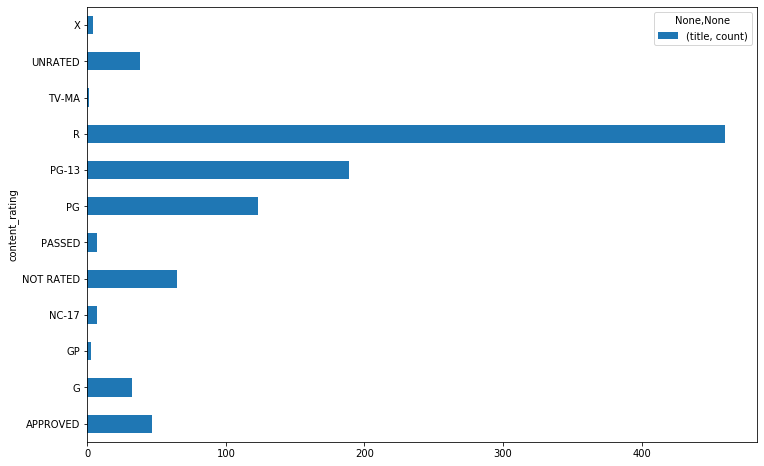

In [82]:
df[['title', 'content_rating']].groupby(['content_rating']).agg(['count']).plot(kind='barh', figsize=(12,8))

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [86]:
#replace the values for column content_ratings
df['content_rating'] = df['content_rating'].replace(to_replace=["NOT RATED", "APPROVED", "PASSED", "GP"], 
                                                    value="UNRATED")
#print the content ratings count one more time to see if replacement correctly happend. We dont see 
#NOT RATED, APPROVED, PASSED and GP anymore.
print(df[['title', 'content_rating']].groupby(['content_rating']).agg(['count']))

               title
               count
content_rating      
G                 32
NC-17              7
PG               123
PG-13            189
R                460
TV-MA              1
UNRATED          160
X                  4


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [88]:
df['content_rating'] = df['content_rating'].replace(to_replace=["X", "TV-MA"], 
                                                    value="NC-17")
print(df[['title', 'content_rating']].groupby(['content_rating']).agg(['count']))

               title
               count
content_rating      
G                 32
NC-17             12
PG               123
PG-13            189
R                460
UNRATED          160


#### Count the number of missing values in each column.

In [89]:
#isnull with sum will give count of missing values in each column
df.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [138]:
#This will print all rows with missing values. We can analyse by content type and assign values accordingly.
df[df.isnull().any(axis=1)]

df.at[187, "content_rating"] = "PG"

df.at[936, "content_rating"] = "PG-13"

df.at[649, "content_rating"] = "PG"

#now below will print empty as i already filled appropriate values in above code.
df[df.isnull().any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [161]:
import math
print("Average star rating of movies longer than 2 hours is "+ 
      str(df.query("duration > 120")["star_rating"].mean()))
if not(math.isnan(df.query("duration <= 120")["star_rating"].mean())):
    print("Average star rating of movies shorter than 2 hours is "+ 
      str(df.query("duration <= 120")["star_rating"].mean()))
else:
    print("No movie is shorter than 2 hours")

Average star rating of movies longer than 2 hours is 7.95366972477064
Average star rating of movies shorter than 2 hours is 7.838489871086555


#### Use a visualization to detect whether there is a relationship between duration and star rating.

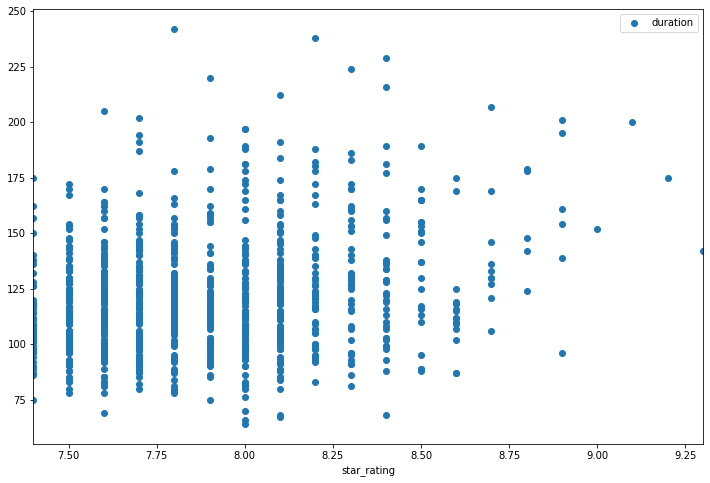

In [163]:
df.plot(x="star_rating", y="duration", style="o", figsize=(12,8))

#### Calculate the average duration for each genre.

In [165]:
df.groupby("genre")["duration"].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

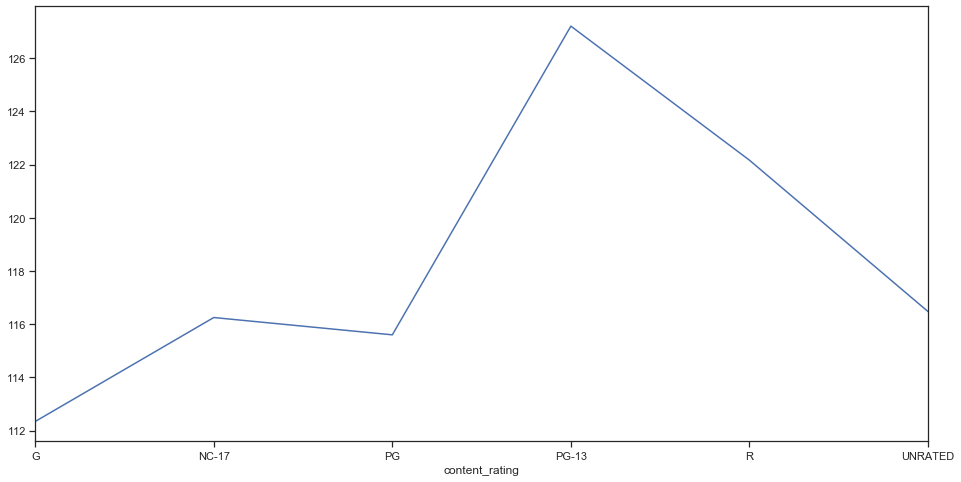

In [187]:
df.groupby("content_rating")["duration"].mean().plot(figsize=(16,8))

#### Determine the top rated movie (by star rating) for each genre.

In [195]:
#we will figure out the indices for max value of star rating for each genre by using group by
idx = df.groupby("genre")["star_rating"].transform(max) == df['star_rating']
df[idx]

,star_rating,title,content_rating,genre,duration,actors_list
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
29,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
105,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
350,8.0,Shadow of a Doubt,UNRATED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [197]:
#A movie should be duplicate if title and actors list both are same. All other columns might have duplicate values.
#below condition should give list of all actual duplicates in given dataframe
df[df.duplicated(['title', 'actors_list'])]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [210]:
#let's check the count of star rating for each genre
df.groupby("genre")["star_rating"].count()
#now by looking at output generate list manually of genres we need to include
manual_list = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Horror", "Mystery"]
#now just print the average value for each genre
df[df["genre"].isin(manual_list)].groupby("genre")["star_rating"].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [224]:
#get the value count of genres
genre_freq = df["genre"].value_counts()
auto_list = []
#if the value count is greater than 10 then put it in auto_list
for val in genre_freq.index:
    if genre_freq[val] > 10:
        auto_list.append(val)
df[df["genre"].isin(auto_list)].groupby("genre")["star_rating"].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [229]:
#condition df['genre'].value_counts()> 10 will generate bool series with all genres which have value count greter
#than 10 having a value of True and False vice versa
df.groupby("genre")["star_rating"].mean()[df['genre'].value_counts()> 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [232]:
df.groupby("genre")["star_rating"].agg(['count', 'mean']).query("count > 10")

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!